# Hotel Booking Analysis 

In [19]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Loading data

df=pd.read_csv('hotel_booking_data.csv')
print(df)

               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July     

In [5]:
# Understanding Data Structure

print(df.shape)
print("--------------------------")
print(df.dtypes)
print("--------------------------")
print(df.info())
print("--------------------------")
print(df.columns)
print("--------------------------")

(119390, 32)
--------------------------
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       o

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

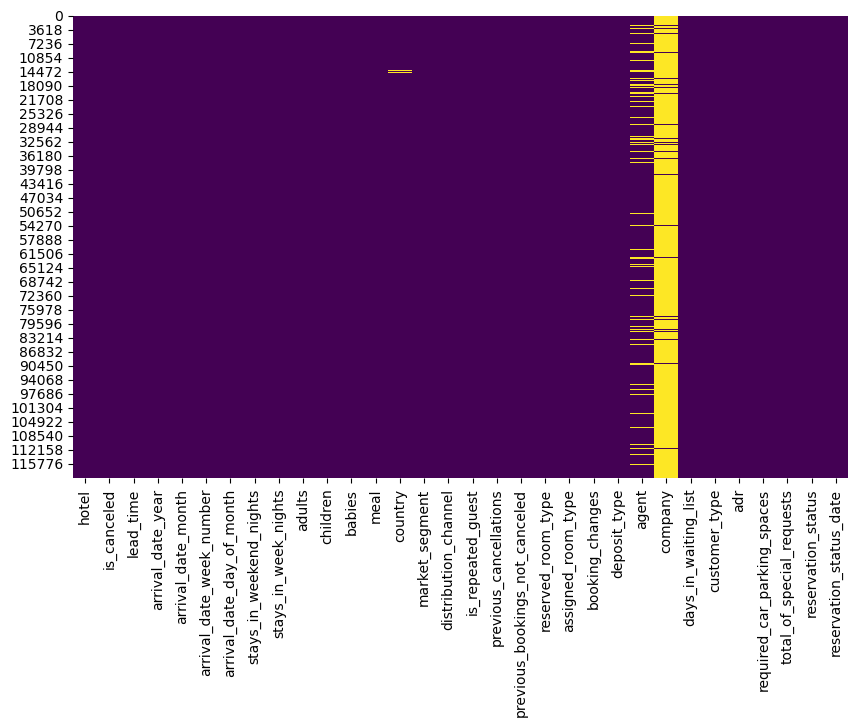

In [8]:
# Missing Values

print(df.isnull().sum())
print("---------  Visualize Missing Data ----------------")

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [9]:
# Handling Missing data
# Imputation Method

df['agent'].fillna(df['agent'].mean(), inplace=True)
df['company'].fillna(df['company'].mean(), inplace=True)

# Dropping Method
df.drop(['country'], axis=1, inplace=True)
df.dropna(inplace=True)

In [13]:
print(df.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [14]:
print(df.shape)

(119386, 31)


In [21]:
# Handling Inconsistent data - No Inconsistent data
# Normalizing or Scaling

numeric_data=df.select_dtypes(include=['float64', 'int64'])
scaler=StandardScaler()
scaled_data=scaler.fit_transform(numeric_data)
print(scaled_data)

[[-0.7670058   2.22701551 -1.63486852 ... -2.015131   -0.25487742
  -0.7206658 ]
 [-0.7670058   5.92334254 -1.63486852 ... -2.015131   -0.25487742
  -0.7206658 ]
 [-0.7670058  -0.90784413 -1.63486852 ... -0.53099499 -0.25487742
  -0.7206658 ]
 ...
 [-0.7670058  -0.6551838   1.19217377 ...  1.1057102  -0.25487742
   4.32477667]
 [-0.7670058   0.04665045  1.19217377 ...  0.05078633 -0.25487742
  -0.7206658 ]
 [-0.7670058   0.94499828  1.19217377 ...  0.9768872  -0.25487742
   1.80205543]]


In [25]:
# Dealing with Categorical data

encoder=OneHotEncoder()
encoded_data=(encoder.fit_transform([['is_canceled']]).toarray())
print(encoded_data)

[[1.]]


is_canceled
0    0.629605
1    0.370395
Name: proportion, dtype: float64


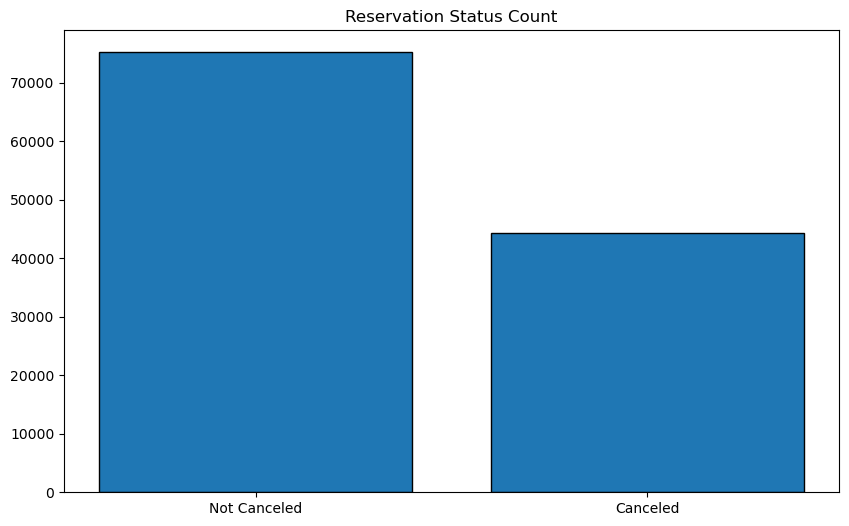

In [28]:
# Visualize data

cancelled_perc=df['is_canceled'].value_counts(normalize=True)
print(cancelled_perc)


plt.figure(figsize=(10,6))
plt.title("Reservation Status Count")
plt.bar(['Not Canceled', 'Canceled'],df['is_canceled'].value_counts(), edgecolor='k')
plt.show()

AttributeError: 'Axes' object has no attribute 'get_legend_handels_labels'

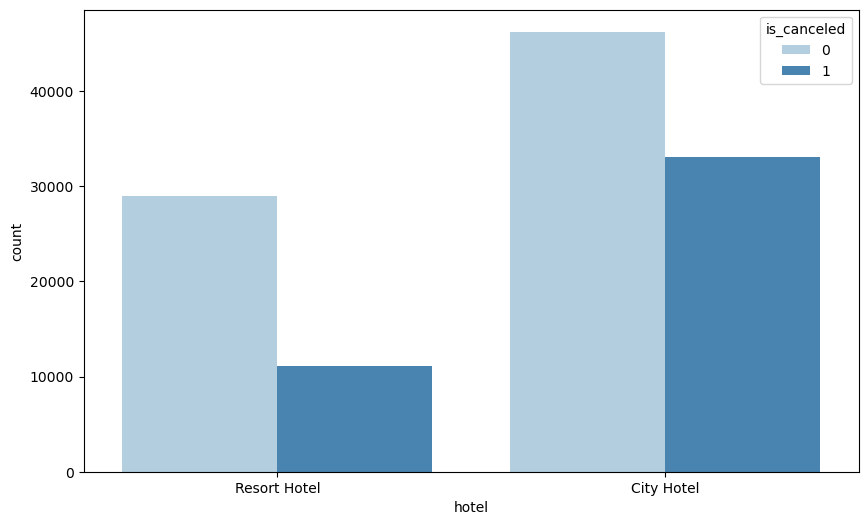

In [30]:
plt.figure(figsize=(10,6))
ax1=sns.countplot(x='hotel', hue='is_canceled', data=df, palette='Blues')
legend_labels,_=ax1.get_legend_handels_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title("Reservation Status in different Hotels", size=20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.legend(['not canceled', 'canceled'])
plt.show()

In [34]:
resort_hotel=df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)


is_canceled
0    0.722366
1    0.277634
Name: proportion, dtype: float64

In [35]:
city_hotel=df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.58276
1    0.41724
Name: proportion, dtype: float64

In [36]:
resort_hotel=resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel=city_hotel.groupby('reservation_status_date')[['adr']].mean()

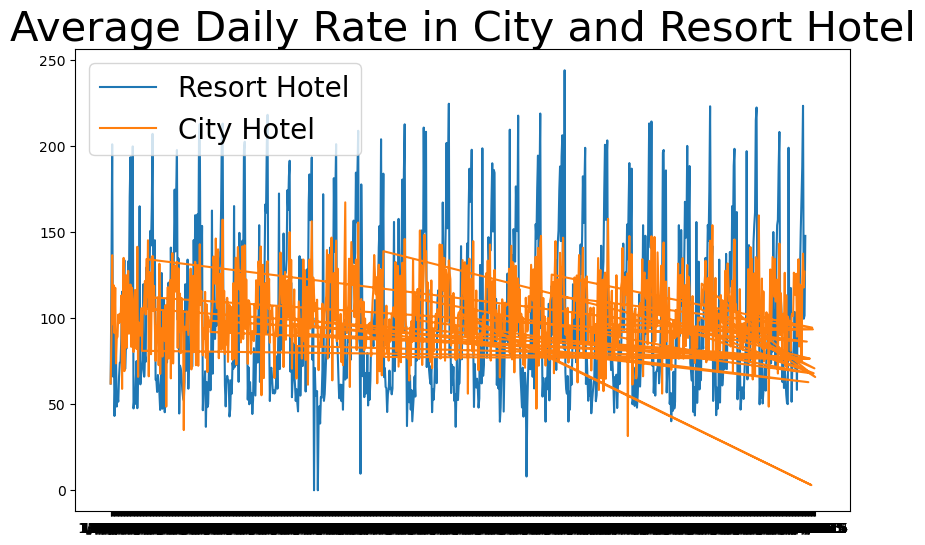

In [38]:
plt.figure(figsize=(10,6))
plt.title("Average Daily Rate in City and Resort Hotel", fontsize=30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label="Resort Hotel")
plt.plot(city_hotel.index, city_hotel['adr'], label="City Hotel")
plt.legend(fontsize=20)
plt.show()

AttributeError: 'Axes' object has no attribute 'get_legend_handels_labels'

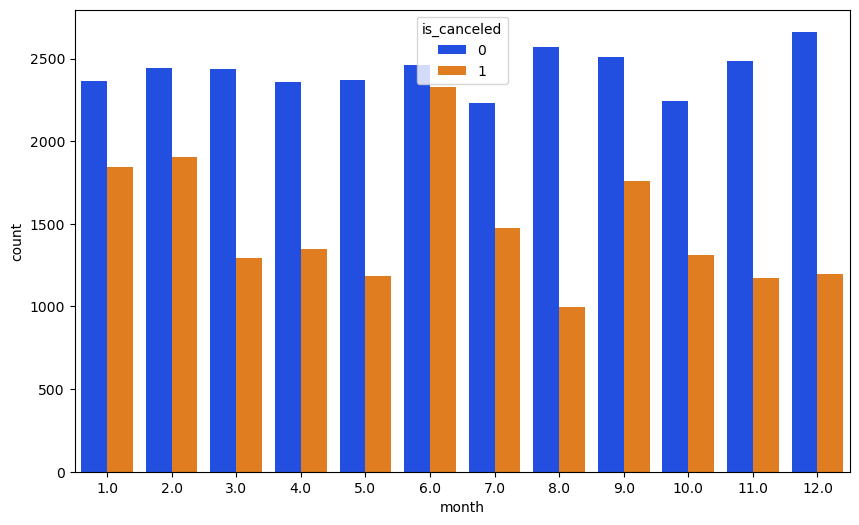

In [42]:
# Convert 'reservation_status_date' to datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')

# Extract month from 'reservation_status_date'
df['month'] = df['reservation_status_date'].dt.month

plt.figure(figsize=(10,6))
ax1=sns.countplot(x='month', hue='is_canceled', data=df, palette='bright')
legend_labels,_=ax1.get_legend_handels_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title("Reservation Status per Month", size=20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled', 'canceled'])
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


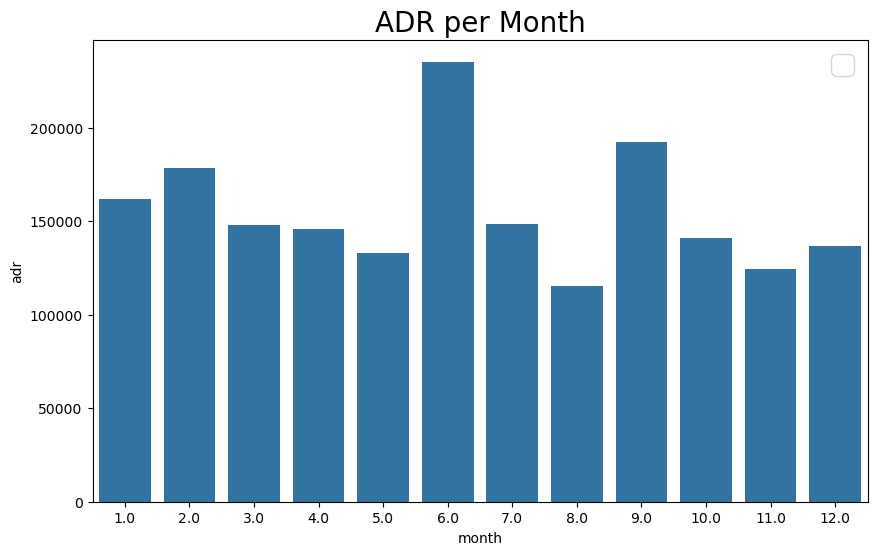

In [45]:
plt.figure(figsize=(10, 6))
plt.title('ADR per Month', fontsize=20)

# Corrected line
sns.barplot(x='month', y='adr', data=df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())

plt.legend(fontsize=20)
plt.show()

In [49]:
df['market_segment'].value_counts()

market_segment
Online TA        56476
Offline TA/TO    24219
Groups           19811
Direct           12605
Corporate         5295
Complementary      743
Aviation           237
Name: count, dtype: int64

In [50]:
df['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.473054
Offline TA/TO    0.202863
Groups           0.165941
Direct           0.105582
Corporate        0.044352
Complementary    0.006224
Aviation         0.001985
Name: proportion, dtype: float64

In [ ]:
cancelled_data['market_segment'].value_counts()